In [2]:
!pip install opencv-contrib-python matplotlib numpy


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [9]:
import cv2 as cv 
import matplotlib.pyplot as plt
import numpy as np

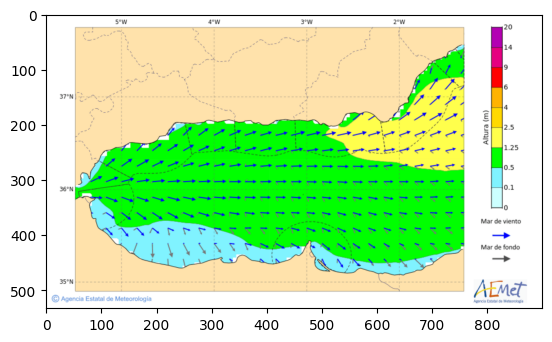

In [15]:
img = cv.imread('../images/2024090700+039_aewam_alb_martot.png')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

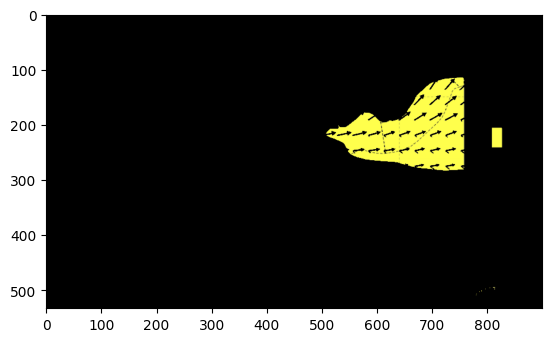

In [16]:
# Using the colour meter, I've seen that the yellow in the image is 255,255,110. I need to detect pixels with that color.
# color detection is best done with HSV, so I'll convert both the image and the rgb color to hsv
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
rgb = np.uint8([[[255,255,110]]])
yellow = cv.cvtColor(rgb, cv.COLOR_RGB2HSV)

# I'll use inRange to get a mask of the pixels that are close to the yellow color
lower =np.array( [yellow[0][0][0] - 2, 100, 100])
upper = np.array([yellow[0][0][0] + 2, 255, 255])
mask = cv.inRange(hsv, lower, upper)

result = cv.bitwise_and(img, img, mask=mask)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))

